In [25]:
import numpy as np
import underworld as uw
from underworld import function as fn
import glucifer
import operator


In [26]:
#If run through Docker we'll point at the local 'unsupported dir.'
#On hpc, the path should also include a directory holding the unsupported_dan.
import os
import sys

if os.getcwd() == '/workspace/newSlab':
    sys.path.append('../unsupported')

#this does't actually need to be protected. More a reminder it's an interim measure
try:
    sys.path.append('../../unsupported')
except:
    pass

#%load_ext autoreload
from unsupported_dan.interfaces.interface2D import interface2D, interface_collection

from unsupported_dan.interfaces.smoothing2D import *


In [27]:
minX = -1.0
maxX = 1.0
resX = 24
resY = 12
elementType="Q1/dQ0"

mesh = uw.mesh.FeMesh_Cartesian( elementType = (elementType), 
                                 elementRes  = ( resX, resY), 
                                 minCoord    = ( minX, -1.0), 
                                 maxCoord    = ( maxX, 1.0),
                                 periodic    = [False, False]  ) 


velocityField    = uw.mesh.MeshVariable( mesh=mesh,         nodeDofCount=mesh.dim )

velocityField.data[:] = [0.,0.]


In [69]:
N = 51
xs = np.linspace(-1., 1, N)*0.9 - 0.01
ys = np.linspace(-1., 1, N)*0.9 + 0.05

In [70]:
line1 = interface2D(mesh, velocityField, xs, ys, 
                        0, 1, insidePt=(0.,-1.))



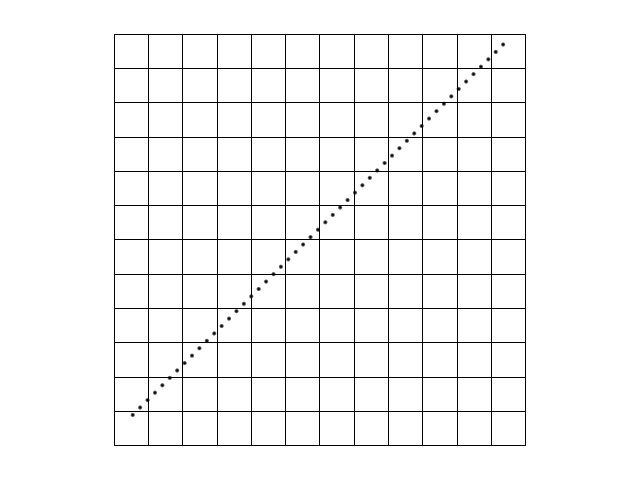

In [35]:
fig1 = glucifer.Figure()
fig1.append( glucifer.objects.Mesh(mesh))
fig1.append( glucifer.objects.Points(line1.swarm, pointsize = 5))

fig1.show()

In [36]:
#mask.astype('bool')

In [37]:
print('hello from rank {}, with {} local particles, and {} global particles'.format(uw.rank(), 
                                                                                    line1.swarm.particleLocalCount, 
                                                                                    line1.swarm.particleGlobalCount))

hello from rank 0, with 51 local particles, and 51 global particles


In [38]:
if line1.swarm.particleLocalCount > 12:
    mask = np.ones(line1.swarm.particleLocalCount).astype('bool')
else:
    mask = np.zeros(line1.swarm.particleLocalCount).astype('bool')

with line1.swarm.deform_swarm():
        line1.swarm.particleCoordinates.data[mask] = (9999999., 9999999.)
    
uw.barrier()
line1.rebuild()


In [47]:
coords = fn.input()

In [65]:
#newParts = np.array(coords.evaluate(mesh).mean(axis=0))
#np.expand_dims(newParts, 0).shape

(1, 2)

In [60]:
all_particle_coords = line1.data
if all_particle_coords.shape[1] == 0:
    newParts = np.array(coords.evaluate(mesh).mean(axis=0))
    newParts = np.expand_dims(newParts, 0)
else:
    newParts = np.empty([0,2])
    
line1.swarm.add_particles_with_coordinates(newParts )

array([], dtype=int32)

In [22]:
def try_to_crash(interface2D, k):

    #First we want to get the distances between neighbours for each point
    A = interface2D.neighbourMatrix( k =k)
    #and we only want to return the vector corresponding to local points
    shmask = shadowMask(interface2D)
    all_particle_coords = interface2D.data
    Alow = np.tril(A) #We want only the lower half of the matrix,
    pd = interface2D.pairDistanceMatrix()
    AF = Alow[shmask]  #*pdMask[shmask]
    
    return None

In [12]:
ds = 0.5*(2.*(np.sqrt(2)*0.9))/N

In [13]:
#repair_interface2D(line1, ds, k=8)
#Dl = laplaceVector(line1, k = 8, limit=0.2)
#A = line1.neighbourMatrix( k =8)
#print(Dl.shape)
#all_particle_coords = line1.data

In [23]:
try_to_crash(line1,8)

In [14]:
print('hello again from rank {}, with {} local particles, and {} global particles'.format(uw.rank(), 
                                                                                    line1.swarm.particleLocalCount, 
                                                                                    line1.swarm.particleGlobalCount))

hello again from rank 0, with 0 local particles, and 0 global particles


In [73]:
allcs = line1.data
localcs = line1.swarm.particleCoordinates.data
xmatch =np.in1d(allcs[:,0], localcs[:,0])

In [77]:
xmatch

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)